In [30]:
import pandas as pd
import numpy as np
import copy

In [31]:
file_names_tech = ["AMD","AMZN","GOOG","INTC","MSFT","NVDA","TSLA"]
data_tech  =pd.DataFrame()
temp = pd.read_csv("../project/data_tech/AAPL.csv",header = 0)
data_tech["date"] = pd.to_datetime(temp["Date"])
data_tech["AAPL"] = temp["Adj Close"]
for i in file_names_tech:
    temp = pd.read_csv(f"../project/data_tech/{i}.csv",header = 0)
    data_tech[f"{i}"] = temp["Adj Close"]
#data_tech.info()


file_names_economy = ["CAT","FDX","LVMUY","PCG","WMT"]
data_economy  =pd.DataFrame()
temp = pd.read_csv("../project/data_econ/AA.csv",header = 0)
data_economy["date"] = pd.to_datetime(temp["Date"])
data_economy["AA"] = temp["Adj Close"] 
for i in file_names_economy:
    temp = pd.read_csv(f"../project/data_econ/{i}.csv",header = 0)
    data_economy[f"{i}"] = temp["Adj Close"]
#data_economy.info()


file_names_energy = ["CVX","EOG","PSX","SLB","XOM"]
data_energy  =pd.DataFrame()
temp = pd.read_csv("../project/data_ener/COP.csv",header = 0) 
data_energy["date"] = pd.to_datetime(temp["Date"])
data_energy["COP"] = temp["Adj Close"] 
for i in file_names_energy:
    temp = pd.read_csv(f"../project/data_ener/{i}.csv",header = 0)
    data_energy[f"{i}"] = temp["Adj Close"]
#data_energy.info()


file_names_banking = ["C","JPM","PYPL","USB","WFC"] 
data_banking  =pd.DataFrame()
temp = pd.read_csv("../project/data_bank/BAC.csv",header = 0) 
data_banking["date"] = pd.to_datetime(temp["Date"])
data_banking["BAC"] = temp["Adj Close"] 
for i in file_names_banking:
    temp = pd.read_csv(f"../project/data_bank/{i}.csv",header = 0)
    data_banking[f"{i}"] = temp["Adj Close"]
#data_banking.info()
data_tech.set_index("date",inplace=True)
data_banking.set_index("date",inplace=True)
data_economy.set_index("date",inplace=True)
data_energy.set_index("date",inplace=True)

PROCESSING ON THE DATA STARTS NOW.

In [32]:
#WITHIN dates -> date1 and date2 input parameters
def process(start_date,end_date,data):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    x = data.loc[start_date:end_date]
    #print(x)
    temp = copy.deepcopy(x)
    total = x.shape[1]
    rows = x.shape[0]
    temp.drop(index=temp.index[0],axis=0,inplace=True)
    #print("---------")
    #print(temp)
    for i in range(1,rows):
        for j in range(total):
            temp.iloc[i-1,j]=(x.iloc[i,j]-x.iloc[i-1,j])/x.iloc[i-1,j]
    
    #Now temp is basically just defined as the return matrix.
    temp["avg_return"] = temp.sum(axis=1)/total
    return temp["avg_return"].sum(axis=0) * 100


In [34]:
tech_list,ener_list,econ_list,bank_list = [],[],[],[]
actual_start = pd.to_datetime("2023-02-01")
actual_end = pd.to_datetime("2023-03-10")

date_s = list(data_tech.index)
#But we only need the dates used in the sentiment analysis section, the range of which is defined by the actual_start and actual_end dates.
date_s = list(filter(lambda x:x>=actual_start and x<=actual_end,date_s))
#print(date_s)
#index_list is going to be used in the final plotting function..
index_list = list(map(lambda x:x.strftime('%m-%d-%Y'),date_s))
#print(index_list)

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    tech_list.append(process(start,end,data_tech))

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    ener_list.append(process(start,end,data_energy))

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    econ_list.append(process(start,end,data_economy))

for i in range(0,len(index_list)-2):
    start = index_list[i]
    end = index_list[i+2]
    bank_list.append(process(start,end,data_banking))


#Now we have all the lists.
# print(len(tech_list))
# print(len(ener_list))
# print(len(econ_list))
# print(len(bank_list))


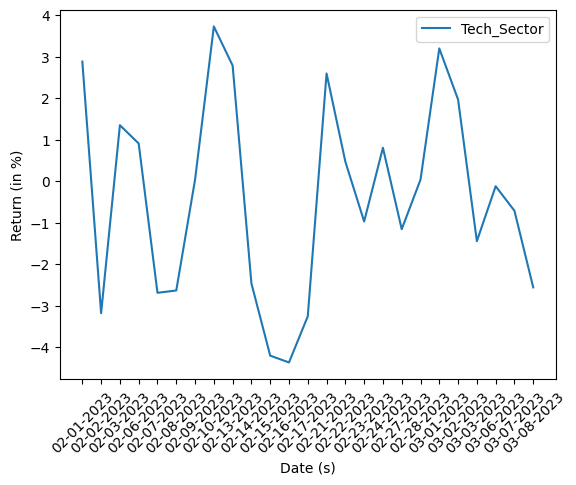

In [35]:
#plotting will start from here.
from matplotlib import pyplot as plt


#Uncomment this line if you want to shorten the length of the x-labels i the plot to reflect only the month and day. 
# index_list = list(map(lambda x:x[:5],index_list))
plt.plot(index_list[:-2], tech_list,label = 'Tech_Sector')
plt.xlabel("Date (s)")
plt.ylabel("Return (in %)")
plt.xticks(rotation=45)
plt.legend()


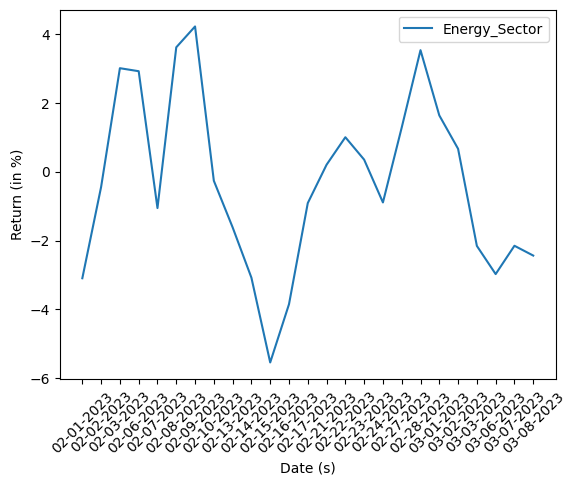

In [36]:
plt.plot(index_list[:-2], ener_list,label = 'Energy_Sector')
plt.xlabel("Date (s)")
plt.ylabel("Return (in %)")
plt.xticks(rotation=45)
plt.legend()


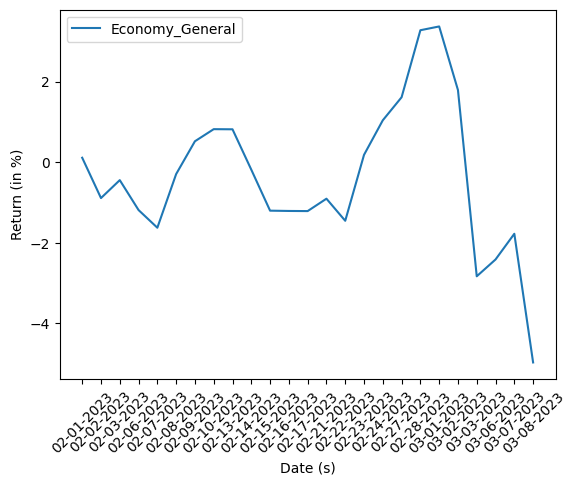

In [37]:
plt.plot(index_list[:-2], econ_list,label = 'Economy_General')
plt.xlabel("Date (s)")
plt.ylabel("Return (in %)")
plt.xticks(rotation=45)
plt.legend()


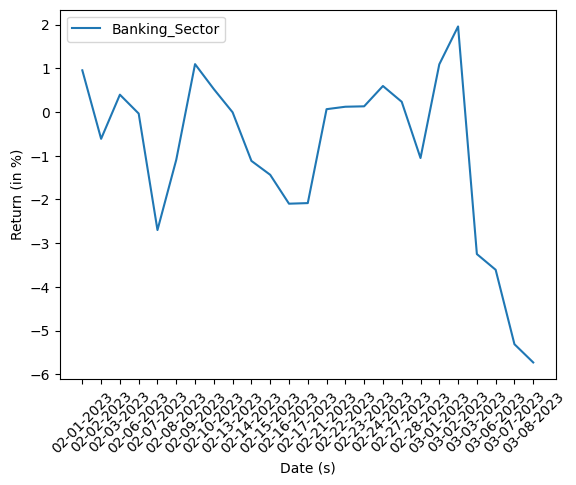

In [38]:
plt.plot(index_list[:-2], bank_list,label = 'Banking_Sector')

plt.xlabel("Date (s)")
plt.ylabel("Return (in %)")
plt.xticks(rotation=45)
plt.legend()